## Outcomes and Random Variables

In [1]:
import pandas as pd
import numpy as np

In [2]:
die = pd.DataFrame([1,2,3,4,5,6]) 

In [3]:
sum_of_dice = die.sample(2,replace=True).sum().loc[0] # value will keep changing each time you run this cell
print('Sum of dice is',sum_of_dice)

Sum of dice is 6


In [4]:
trial = 10000            
result = [die.sample(2,replace=True).sum().loc[0] for i in range(trial)]
result[:10]

[9, 5, 3, 7, 10, 8, 9, 8, 10, 5]

## Frequency and Distributions

In [5]:
freq = pd.DataFrame(result)[0].value_counts() #created a df having index and columns from result 
sort_freq = freq.sort_index()
len(sort_freq)

11

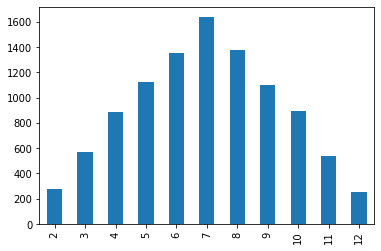

In [6]:
rel_freq = sort_freq/trial
rel_freq.plot(kind ='bar')
sort_freq.plot(kind ='bar')

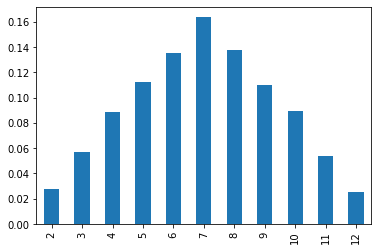

In [7]:
rel_freq.plot(kind ='bar')

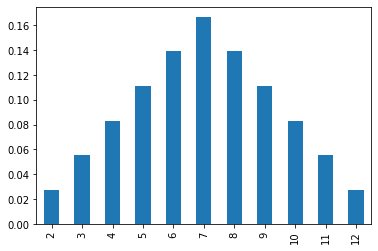

In [8]:
x_distri = pd.DataFrame(index = [2,3,4,5,6,7,8,9,10,11,12])
x_distri['prob'] = [1,2,3,4,5,6,5,4,3,2,1]      # probability of each outcome in the die toss
x_distri['prob'] = x_distri['prob']/36          # probabilty of one dice having any number come up is 1/6
x_distri['prob'].plot(kind ='bar')

In [9]:
mean = (x_distri.index*x_distri['prob']).sum()
mean

6.999999999999998

In [10]:
variance = (((x_distri.index-mean)**2)*x_distri['prob']).sum() # var is summation of (x-mean)^2 *p(x)
variance 

5.833333333333333

In [11]:
sd = variance**1/2          # std deviation
sd

2.9166666666666665

#### Logging Daily Return of Facebook Stock. Download the .csv from [here](https://www.kaggle.com/aayushmishra1512/facebook-complete-stock-data2012-2020latest)

#### Now it is important to sum up what exactly we have upto this point
#### We only have Data regarding the opening and closing price of a stock for a couple of years in time
#### What we want to see is if we had invested in the company buying x amount of stocks , how it would turn out for us?
#### So we begin by creating a 'Returns' column i.e Series in our fb DataFrame 

In [12]:
fb = pd.read_csv(r'../Week2/fb.csv')
fb['Returns'] = fb['Close'].shift(-1) - fb['Close']
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,-4.200001
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,-3.029999
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,1.000000
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,1.029999
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,-1.119999


#### For sake of simplicity lets say we owned only one stock in fb from 18th May 2012

#### Now we plot the graph of  Returns vs Number of Days the value occured

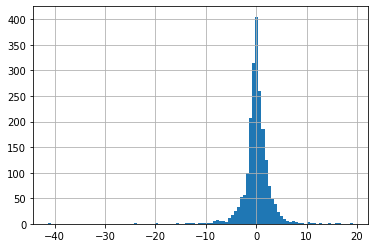

In [13]:
#plt.plot(fb['Returns'],fb.index)
fb['Returns'].hist(bins=100)

#### Now we take log of return to reduce the outliers and bring our values closer to each other. We do this so we can get close to some kind curve with which we can understand the the patterns observed.  
#### Note that this won't effect the purpose of our work here ,which is to see which graph would better fit our data

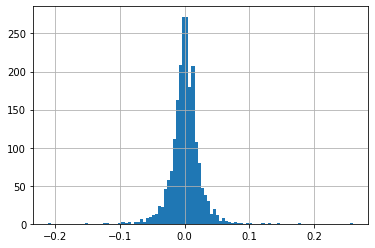

In [14]:
fb['Logreturn'] = np.log(fb['Close']).shift(-1)-np.log(fb['Close'])
fb['Logreturn'].hist(bins=100)

####  A video for understanding what is PDF and CDF [here](https://youtu.be/YXLVjCKVP7U)

In [15]:
from scipy.stats import norm

In [16]:
density = pd.DataFrame()
density['x'] = np.arange(-4,4,0.001) # np.arange() just includes all values from -4 to 4 here with 0.001 as step 
density['x'].head()  # As a result DataFrame density has a new feature 'x' 

0   -4.000
1   -3.999
2   -3.998
3   -3.997
4   -3.996
Name: x, dtype: float64

In [17]:
density['pdf'] = norm.pdf(density['x'],0,1) # use of norm.pdf and mean,sd to calculate pdf
density['cdf'] = norm.cdf(density['x'],0,1) # use of norm.pdf and mean,sd to calculate pdf 
print(density['pdf'].head(),density['cdf'].head())

0    0.000134
1    0.000134
2    0.000135
3    0.000135
4    0.000136
Name: pdf, dtype: float64 0    0.000032
1    0.000032
2    0.000032
3    0.000032
4    0.000032
Name: cdf, dtype: float64


#### Plotting the density against pdf and cdf to get an understanding 

In [18]:
import matplotlib.pyplot as plt

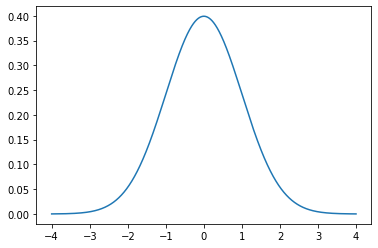

In [19]:
density['pdf']
plt.plot(density['x'],density['pdf'])

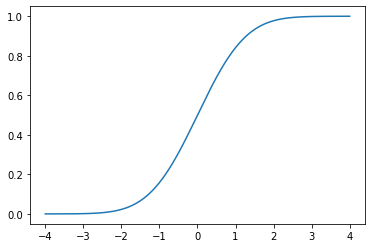

In [20]:
plt.plot(density['x'],density['cdf'])

### Now we shift our attention to the stock data in hand i.e facebook stock data

In [21]:
mu = fb['Logreturn'].mean()  # mean of feature 'Logreturn'
sigma = fb['Logreturn'].std(ddof=1) # std deviation of feature 'Logreturn'
print(mu,sigma)

0.0009282027997259224 0.023346501971697856


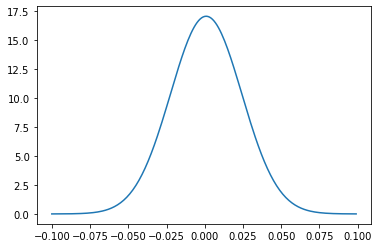

In [22]:
denFb = pd.DataFrame()
denFb['x'] = np.arange(-0.1,0.1,0.001)  # creating a probabilty density for fb
denFb['pdf'] = norm.pdf(denFb['x'],mu,sigma) 
denFb['cdf'] = norm.cdf(denFb['x'],mu,sigma)
plt.plot(denFb['x'],denFb['pdf'])

In [23]:
prob_return1 = norm.cdf(-0.05,mu,sigma)
prob_return1

0.014576694867268822

#### That is we have 1.4% chance that the daily return will drop by 5% on any given day

In [24]:
mu220 = 220*mu
sigma220 = 220**0.5*sigma
print('probability that facebook stock drops over 40% in 220 days',norm.cdf(-0.4,mu220,sigma220))

probability that facebook stock drops over 40% in 220 days 0.04050801616025763


In [25]:
norm.ppf(0.05,mu,sigma) #This States that there is a 5% chance our daily return is less than -3% on a partcular graph 
                        #note that using the mu and sigma values we can calculate the whole graph quite easily 

-0.03747337564505101